# WA Voter Turnout in General Elections

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (18, 10)

In [62]:
df = pd.read_csv('wa_election_data/voter_turnout_by_election.csv')

In [63]:
df.head()

,Election Date,Description,Total Counties,Total Precincts,Eligible Registered Voters,Total Ballots Counted,Turnout
0,2023-11-07,General Election,39,8078,4829084,1758084,0.3641
1,2023-08-01,Primary,36,6474,3865926,1116963,0.2889
2,2023-04-25,April Special Election,19,3189,1671514,530405,0.3173
3,2023-02-14,February Special Election,29,2543,1370164,451969,0.3299
4,2022-11-08,General Election,39,8021,4806852,3067686,0.6382


In [64]:
df.dtypes

Election Date                 object
Description                   object
Total Counties                object
Total Precincts               object
Eligible Registered Voters    object
Total Ballots Counted         object
Turnout                       object
dtype: object

## Data Cleaning

In [82]:
#Election Date as Datetime
df['Election Date'] = pd.to_datetime(df['Election Date'])
df['year'] = df['Election Date'].dt.year


# update dataframe - only after 2000
df = df.loc[df['Election Date'] > '2000-01-01']

In [83]:
df.dtypes

Election Date                 datetime64[ns]
Description                           object
Total Counties                         Int64
Total Precincts                        Int64
Eligible Registered Voters             Int64
Total Ballots Counted                  Int64
Turnout                              float64
year                                   int32
dtype: object

In [84]:
# Where Description includes "General" 

df = df[df['Description'].str.contains("General")]
df.head()

,Election Date,Description,Total Counties,Total Precincts,Eligible Registered Voters,Total Ballots Counted,Turnout,year
0,2023-11-07,General Election,39,8078,4829084,1758084,0.3641,2023
4,2022-11-08,General Election,39,8021,4806852,3067686,0.6382,2022
8,2021-11-02,General Election,39,7722,4814675,1896481,0.3938,2021
12,2020-11-03,General Election,39,7436,4892871,4116894,0.8414,2020
17,2019-11-05,General Election,39,7361,4503871,2035401,0.4519,2019


In [85]:
#Change column value data types

# INT
df['Total Counties'] = df['Total Counties'].replace('-',np.nan).astype('Int64')
df['Total Precincts'] = df['Total Precincts'].replace('-',np.nan).astype('Int64')
df['Eligible Registered Voters'] = df['Eligible Registered Voters'].replace('-',np.nan).astype('Int64')
df['Total Ballots Counted'] = df['Total Ballots Counted'].replace('-',np.nan).astype('Int64')

#Float
df['Turnout'] = df['Turnout'].replace('-',np.nan).astype(float)

In [86]:
df.describe()

,Election Date,Total Counties,Total Precincts,Eligible Registered Voters,Total Ballots Counted,Turnout,year
count,24,17.0,17.0,24.0,24.0,24.000000,24.000000
mean,2012-05-06 06:00:00,39.0,7197.294118,3892757.083333,2271966.041667,0.584883,2011.500000
min,2000-11-07 00:00:00,39.0,6671.0,3209648.0,1300602.0,0.364100,2000.000000
25%,2006-08-08 00:00:00,39.0,6792.0,3364834.25,1768738.5,0.450200,2005.750000
50%,2012-05-08 00:00:00,39.0,7165.0,3781686.0,1986175.5,0.544900,2011.500000
75%,2018-02-06 00:00:00,39.0,7361.0,4293317.25,2929662.75,0.727375,2017.250000
max,2023-11-07 00:00:00,39.0,8078.0,4892871.0,4116894.0,0.846100,2023.000000
std,NaN,0.0,432.493174,571969.803032,734946.4879,0.165469,7.071068


In [87]:
df.describe(include = 'object')

,Description
count,24
unique,8
top,General Election
freq,17


## Exploratory Phase

In [89]:
df

,Election Date,Description,Total Counties,Total Precincts,Eligible Registered Voters,Total Ballots Counted,Turnout,year
0,2023-11-07,General Election,39,8078,4829084,1758084,0.3641,2023
4,2022-11-08,General Election,39,8021,4806852,3067686,0.6382,2022
8,2021-11-02,General Election,39,7722,4814675,1896481,0.3938,2021
12,2020-11-03,General Election,39,7436,4892871,4116894,0.8414,2020
17,2019-11-05,General Election,39,7361,4503871,2035401,0.4519,2019
21,2018-11-06,General Election,39,7269,4362459,3133462,0.7183,2018
25,2017-11-07,General Election,39,7310,4265433,1582481,0.3710,2017
29,2016-11-08,General Election,39,7165,4270270,3363440,0.7876,2016
34,2015-11-03,General Election,39,7237,3974947,1528272,0.3845,2015
38,2014-11-04,General Election,39,7068,3922248,2124330,0.5416,2014


In [76]:
# Visualize Total Ballots Counted over the years

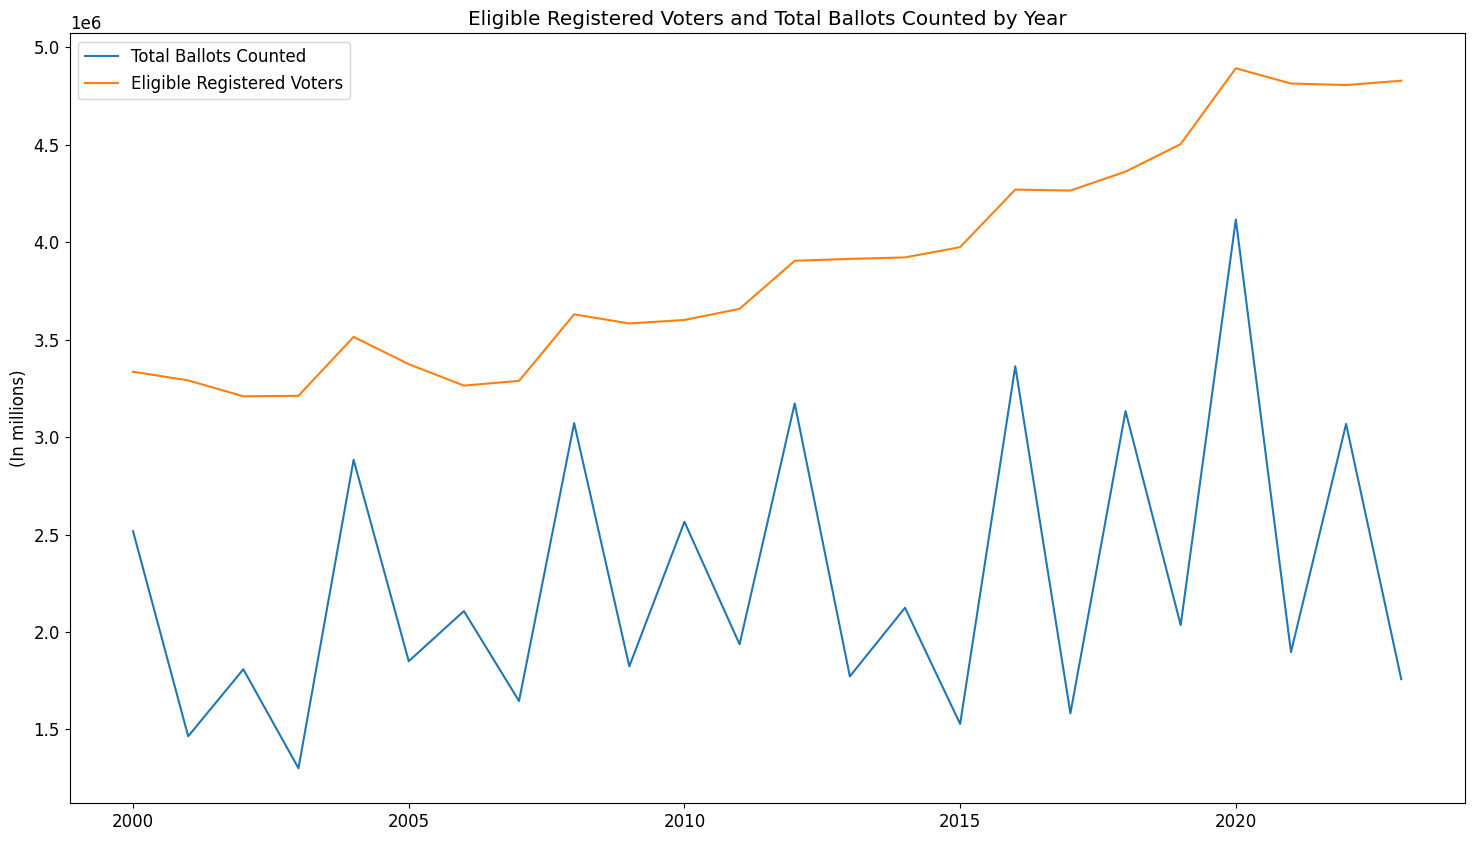

In [99]:
plt.plot(df['year'], df['Total Ballots Counted'], label = 'Total Ballots Counted')
plt.plot(df['year'], df['Eligible Registered Voters'], label = 'Eligible Registered Voters')


plt.title('Eligible Registered Voters and Total Ballots Counted by Year')
#TODO: Fix yaix as shown in millions

plt.ylabel('(In millions)')
plt.legend()
plt.show()

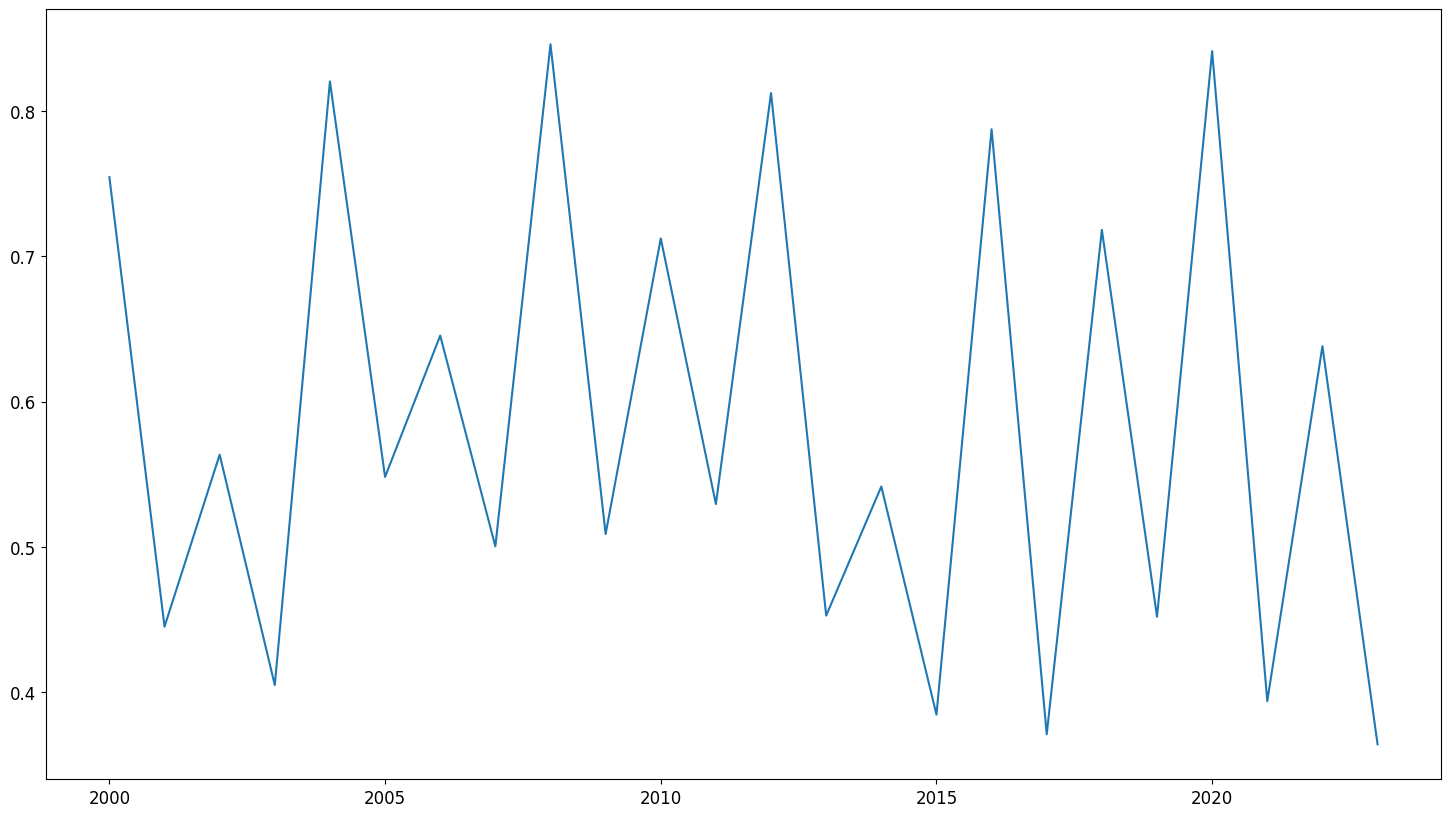

In [100]:
plt.plot(df['year'], df['Turnout'], label = 'Turnout')
